<a href="https://colab.research.google.com/github/UTSAVsarkar/Precious-Metal-Trends-Market-Insights/blob/master/precious_metal_trends_market_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**If you found this notebook helpful, please consider upvoting! Your support is appreciated.**

 # Import Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/precious-metals-history-since-2000-with-news/final_palladium_data.csv
/kaggle/input/precious-metals-history-since-2000-with-news/final_silver_data.csv
/kaggle/input/precious-metals-history-since-2000-with-news/final_gold_data.csv
/kaggle/input/precious-metals-history-since-2000-with-news/final_platinum_data.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
import plotly.graph_objects as go
import plotly.express as px

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer

from scipy.stats import skew
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

In [ ]:
plt.style.use('seaborn')
sns.set_palette('viridis')

In [ ]:
gold = pd.read_csv('/kaggle/input/precious-metals-history-since-2000-with-news/final_gold_data.csv', sep=";")
silver = pd.read_csv('/kaggle/input/precious-metals-history-since-2000-with-news/final_silver_data.csv', sep=";")
platinum = pd.read_csv('/kaggle/input/precious-metals-history-since-2000-with-news/final_platinum_data.csv', sep=";")
palladium = pd.read_csv('/kaggle/input/precious-metals-history-since-2000-with-news/final_platinum_data.csv', sep=";")

# Data Overview

In [ ]:
def gold_overview(df, name):
    print(f"\n{name} goldset Overview")
    print(f"Shape: {df.shape}")

    print("Information about the features:")
    print(df.info())

    print("Basic statistics check:")
    print(df.describe())

In [ ]:
gold_overview(gold, 'Gold')


Gold goldset Overview
Shape: (6177, 9)
Information about the features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6177 entries, 0 to 6176
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  6177 non-null   object 
 1   open       6177 non-null   float64
 2   high       6177 non-null   float64
 3   low        6177 non-null   float64
 4   close      6177 non-null   float64
 5   volume     6177 non-null   int64  
 6   currency   6177 non-null   object 
 7   unit       6177 non-null   object 
 8   headlines  6177 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 434.4+ KB
None
Basic statistics check:
              open         high          low        close         volume
count  6177.000000  6177.000000  6177.000000  6177.000000    6177.000000
mean   1181.017241  1186.953392  1174.885090  1181.012304    4298.049377
std     606.257425   609.741360   602.902334   606.424369   24281.9118

In [ ]:
gold_overview(silver, 'Silver')


Silver goldset Overview
Shape: (6176, 9)
Information about the features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6176 entries, 0 to 6175
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  6176 non-null   object 
 1   open       6176 non-null   float64
 2   high       6176 non-null   float64
 3   low        6176 non-null   float64
 4   close      6176 non-null   float64
 5   volume     6176 non-null   float64
 6   currency   6176 non-null   object 
 7   unit       6176 non-null   object 
 8   headlines  6176 non-null   object 
dtypes: float64(5), object(4)
memory usage: 434.4+ KB
None
Basic statistics check:
              open         high          low        close         volume
count  6176.000000  6176.000000  6176.000000  6176.000000    6176.000000
mean     17.231361    17.347975    17.102428    17.224150    1454.875324
std       8.611617     8.701887     8.510736     8.604334    8489.667302
min  

In [ ]:
gold_overview(platinum, 'Platinum')


Platinum goldset Overview
Shape: (5490, 9)
Information about the features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5490 entries, 0 to 5489
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  5490 non-null   object 
 1   open       5490 non-null   float64
 2   high       5490 non-null   float64
 3   low        5490 non-null   float64
 4   close      5490 non-null   float64
 5   volume     5490 non-null   float64
 6   currency   5490 non-null   object 
 7   unit       5490 non-null   object 
 8   headlines  5490 non-null   object 
dtypes: float64(5), object(4)
memory usage: 386.1+ KB
None
Basic statistics check:
              open         high          low        close       volume
count  5490.000000  5490.000000  5490.000000  5490.000000   5490.00000
mean   1070.423989  1073.386685  1067.644299  1070.695228    324.22714
std     347.155856   347.166696   347.219916   347.274797   1239.51526
min     406

In [ ]:
gold_overview(palladium, 'Palladium')


Palladium goldset Overview
Shape: (5490, 9)
Information about the features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5490 entries, 0 to 5489
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  5490 non-null   object 
 1   open       5490 non-null   float64
 2   high       5490 non-null   float64
 3   low        5490 non-null   float64
 4   close      5490 non-null   float64
 5   volume     5490 non-null   float64
 6   currency   5490 non-null   object 
 7   unit       5490 non-null   object 
 8   headlines  5490 non-null   object 
dtypes: float64(5), object(4)
memory usage: 386.1+ KB
None
Basic statistics check:
              open         high          low        close       volume
count  5490.000000  5490.000000  5490.000000  5490.000000   5490.00000
mean   1070.423989  1073.386685  1067.644299  1070.695228    324.22714
std     347.155856   347.166696   347.219916   347.274797   1239.51526
min     40

# Handle Timestamp

In [ ]:
for df in [gold, silver, platinum, palladium]:
    df['timestamp'] = pd.to_datetime(df['timestamp'])

Check date ranges

In [ ]:
print(gold['timestamp'].min(), gold['timestamp'].max())

2000-08-30 00:00:00 2025-04-14 00:00:00


# Price Trends

In [ ]:
def plot_price(df, metal_name):
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=df['timestamp'],
        y=df['close'],
        mode='lines',
        name=f'{metal_name} Close Price',
        line=dict(color='royalblue')
    ))

    fig.update_layout(
        title=f'{metal_name} Closing Price Over Time',
        xaxis_title='Date',
        yaxis_title='Close Price',
        template='plotly_white',
        xaxis=dict(showgrid=False),
        yaxis=dict(showgrid=False)
    )

    fig.show(renderer='iframe')

In [ ]:
plot_price(gold, 'Gold')

In [ ]:
plot_price(silver, 'Silver')

In [ ]:
plot_price(platinum, 'Platinum')

In [ ]:
plot_price(palladium, 'Palladium')

# Combined price comparison

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=gold['timestamp'], y=gold['close'], mode='lines', name='Gold', line=dict(color='gold')))
fig.add_trace(go.Scatter(x=silver['timestamp'], y=silver['close'], mode='lines', name='Silver', line=dict(color='silver')))
fig.add_trace(go.Scatter(x=platinum['timestamp'], y=platinum['close'], mode='lines', name='Platinum', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=palladium['timestamp'], y=palladium['close'], mode='lines', name='Palladium', line=dict(color='purple')))

fig.update_layout(
    title='Precious Metals Closing Prices',
    xaxis_title='Date',
    yaxis_title='Price',
    template='plotly_white',
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)

fig.show(renderer='iframe')

# Volume Trends

In [ ]:
import plotly.graph_objects as go

def plot_volume_with_close_price(df, metal_name):
    trace_volume = go.Scatter(x=df['timestamp'], y=df['volume'],
                              mode='lines', name='Volume', line=dict(color='orange', width=2), yaxis='y1')

    trace_close = go.Scatter(x=df['timestamp'], y=df['close'],
                             mode='lines', name='Close Price', line=dict(color='green', width=3), yaxis='y2')

    layout = go.Layout(
        title=f'{metal_name} Trading Volume vs Close Price',
        xaxis=dict(title='Date'),
        yaxis=dict(title='Volume', side='left', range=[0, df['volume'].max()*1.1]),  # Left y-axis for volume
        yaxis2=dict(title='Close Price', side='right', overlaying='y', range=[df['close'].min()*0.9, df['close'].max()*1.1]),  # Right y-axis for close price
        legend=dict(x=0, y=1, traceorder='normal'),
        template='plotly',
        plot_bgcolor='white'
    )

    fig = go.Figure(data=[trace_volume, trace_close], layout=layout)
    fig.show(renderer='iframe')

**Four outcomes:-**

1. **Price goes up with high volume**:
   - **What it means**: Lots of people are buying, pushing the price up.
   - **Signal**: Strong, positive momentum (bullish).

2. **Price goes up with low volume**:
   - **What it means**: Price is rising, but not many people are buying.
   - **Signal**: Weak momentum, possibly unsustainable (false signal).

3. **Price goes down with high volume**:
   - **What it means**: Lots of people are selling, pushing the price down.
   - **Signal**: Strong, negative momentum (bearish).

4. **Price goes down with low volume**:
   - **What it means**: Price is dropping, but not many are selling.
   - **Signal**: Weak selling pressure, the decline might not last.

In [ ]:
plot_volume_with_close_price(gold, 'Gold')

In [ ]:
plot_volume_with_close_price(silver, 'Silver')

In [ ]:
plot_volume_with_close_price(platinum, 'Platinum')

In [ ]:
plot_volume_with_close_price(palladium, 'Palladium')

# Daily Returns & Volatility

In [ ]:
def calculate_returns(df):
    df['daily_return'] = df['close'].pct_change()

In [ ]:
for df in [gold, silver, platinum, palladium]:
    calculate_returns(df)

In [ ]:
def plot_return_histogram(df, metal_name):
    returns = df['daily_return'].dropna()
    skewness = skew(returns)

    plt.figure(figsize=(10,5))
    sns.histplot(returns, bins=100, kde=True, color='skyblue', edgecolor='black', alpha=0.7)

    plt.title(f'{metal_name} Daily Returns Distribution\nSkewness = {skewness:.4f}', fontsize=16)
    plt.xlabel('Daily Return', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

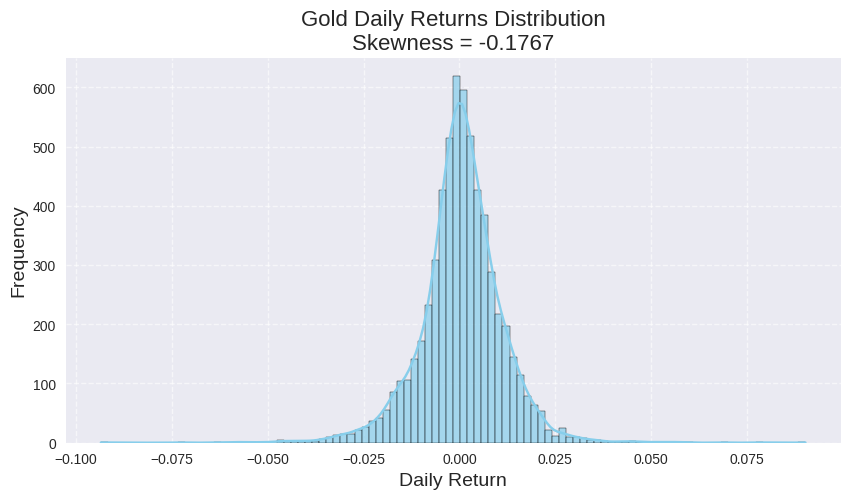

In [ ]:
plot_return_histogram(gold, 'Gold')

> **What does it mean?:** Gold’s price doesn’t move much. It mostly goes up or stays steady, but occasionally, it might dip slightly.

>**Business Takeaway:** Gold is safe and predictable. It’s good for people who want stable investments with little risk, but they shouldn’t expect huge profits.

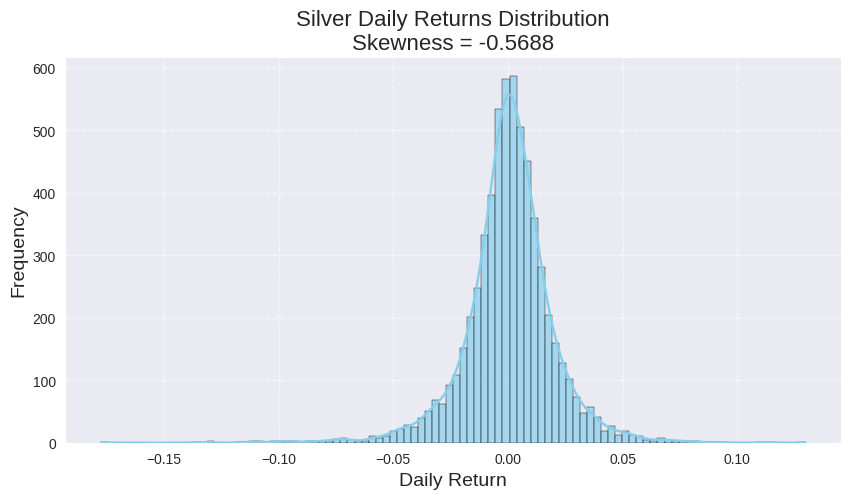

In [ ]:
plot_return_histogram(silver, 'Silver')

> **What does it mean?:** Silver’s price tends to drop more often than gold. The changes are usually small, but it has a bigger chance of losing value.

> **Business Takeaway:** Silver is a bit riskier than gold. It’s okay for investors who are comfortable with small drops in price, but it’s not for people looking for big gains.

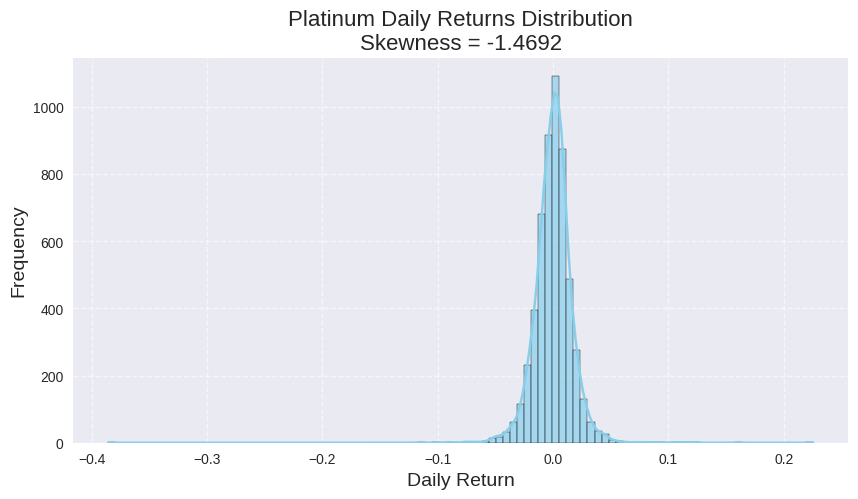

In [ ]:
plot_return_histogram(platinum, 'Platinum')

> **What does it mean?:** Platinum’s price often drops. It has a higher chance of going down than going up.

> **Business Takeaway:** Platinum is riskier than gold and silver. It’s more for people who are okay with losing money sometimes but still want to try for bigger profits in the long run.

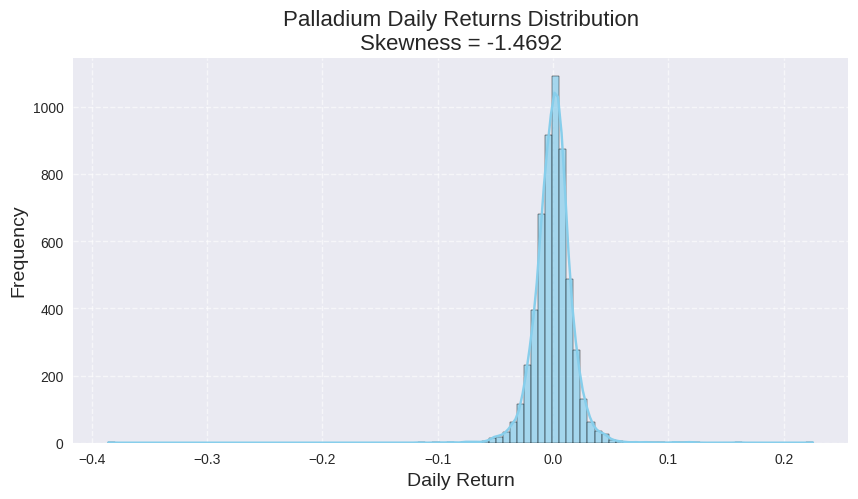

In [ ]:
plot_return_histogram(palladium, 'Palladium')

> **What does it mean?:** Palladium doesn’t move much, but when it does, it can go up a lot. There are occasional big gains.

> **Business Takeaway:** Palladium can give big returns, but it’s unpredictable. It’s for investors who are willing to take more risk for the chance to make a lot of money when the price spikes.

# Correlation of Returns

In [ ]:
returns = pd.DataFrame({
    'gold': gold['daily_return'],
    'silver': silver['daily_return'],
    'platinum': platinum['daily_return'],
    'palladium': palladium['daily_return']
})

In [ ]:
returns = returns.dropna()

In [ ]:
corr_matrix = returns.corr()

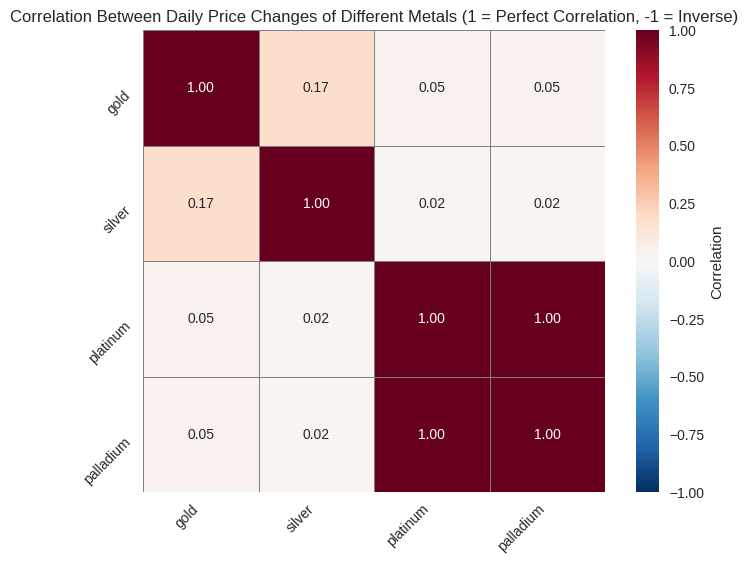

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', fmt='.2f', vmin=-1, vmax=1,
            cbar_kws={'label': 'Correlation'}, annot_kws={'size': 10}, linewidths=0.5,
            linecolor='gray', square=True)
plt.title('Correlation Between Daily Price Changes of Different Metals (1 = Perfect Correlation, -1 = Inverse)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, va='top')
plt.show()

> These metals’ returns don’t strongly affect each other. They mostly move independently of each other.

> This is good for diversification in an investment portfolio because you’re not taking on the same risk from each metal—if one goes up or down, it doesn’t necessarily mean the others will do the same

# Sentiment Impact on Precious Metals

In [ ]:
# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

In [ ]:
# Create a new column 'sentiment_score' based on the headlines
gold['sentiment_score'] = gold['headlines'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
silver['sentiment_score'] = silver['headlines'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
platinum['sentiment_score'] = platinum['headlines'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
palladium['sentiment_score'] = palladium['headlines'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

In [ ]:
# Group by date and calculate daily average sentiment score
gold_daily_sentiment = gold.groupby(gold['timestamp'].dt.date)['sentiment_score'].mean()
silver_daily_sentiment = silver.groupby(silver['timestamp'].dt.date)['sentiment_score'].mean()
platinum_daily_sentiment = platinum.groupby(platinum['timestamp'].dt.date)['sentiment_score'].mean()
palladium_daily_sentiment = palladium.groupby(palladium['timestamp'].dt.date)['sentiment_score'].mean()

In [ ]:
# Converting the timestamp columns to datetime format for the main metal DataFrames
gold['timestamp'] = pd.to_datetime(gold['timestamp'])
silver['timestamp'] = pd.to_datetime(silver['timestamp'])
platinum['timestamp'] = pd.to_datetime(platinum['timestamp'])
palladium['timestamp'] = pd.to_datetime(palladium['timestamp'])

In [ ]:
# Converting the index of sentiment DoldFrames to DataFrames format
gold_daily_sentiment.index = pd.to_datetime(gold_daily_sentiment.index)
silver_daily_sentiment.index = pd.to_datetime(silver_daily_sentiment.index)
platinum_daily_sentiment.index = pd.to_datetime(platinum_daily_sentiment.index)
palladium_daily_sentiment.index = pd.to_datetime(palladium_daily_sentiment.index)

In [ ]:
gold_sentiment_returns = pd.merge(gold_daily_sentiment, gold[['timestamp', 'daily_return']],
                                  left_index=True, right_on='timestamp', how='inner')
silver_sentiment_returns = pd.merge(silver_daily_sentiment, silver[['timestamp', 'daily_return']],
                                    left_index=True, right_on='timestamp', how='inner')

platinum_sentiment_returns = pd.merge(platinum_daily_sentiment, platinum[['timestamp', 'daily_return']],
                                      left_index=True, right_on='timestamp', how='inner')

palladium_sentiment_returns = pd.merge(palladium_daily_sentiment, palladium[['timestamp', 'daily_return']],
                                       left_index=True, right_on='timestamp', how='inner')

In [ ]:
def plot_sentiment_vs_returns(metal_sentiment_returns, metal_name, color):
    fig = px.scatter(
        metal_sentiment_returns,
        x='sentiment_score',
        y='daily_return',
        color_discrete_sequence=[color],
        title=f'{metal_name}: Sentiment vs Daily Returns',
        labels={'sentiment_score': 'Sentiment Score', 'daily_return': 'Daily Return'}
    )
    fig.update_layout(
        title=f'{metal_name}: Sentiment vs Daily Returns',
        xaxis_title='Sentiment Score',
        yaxis_title='Daily Return',
        showlegend=False
    )
    fig.show(renderer='iframe')

In [ ]:
plot_sentiment_vs_returns(gold_sentiment_returns, 'Gold', 'gold')

In [ ]:
plot_sentiment_vs_returns(silver_sentiment_returns, 'Silver', 'silver')

In [ ]:
plot_sentiment_vs_returns(platinum_sentiment_returns, 'Platinum', 'blue')

In [ ]:
plot_sentiment_vs_returns(palladium_sentiment_returns, 'Palladium', 'palevioletred')

# **What Headlines Move the Market Most?**

*Here our goal is to find the types of news headlines that cause big positive or big negative market movements.*

In [ ]:
gold.isnull().sum()

timestamp          0
open               0
high               0
low                0
close              0
volume             0
currency           0
unit               0
headlines          0
daily_return       1
sentiment_score    0
dtype: int64

In [ ]:
gold = gold.dropna(subset=['headlines', 'daily_return'])

In [ ]:
# Define thresholds
threshold = 0.01  # 1% move

# Creating label
df['big_move'] = df['daily_return'].apply(lambda x: 'positive' if x > threshold else ('negative' if x < -threshold else 'neutral'))

# Checking distribution
df['big_move'].value_counts()

big_move
neutral     3116
positive    1201
negative    1173
Name: count, dtype: int64

In [ ]:
df_big = df[df['big_move'] != 'neutral']

In [ ]:
# TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)  # you can adjust max_features

X_tfidf = tfidf.fit_transform(df_big['headlines'])
feature_names = tfidf.get_feature_names_out()

In [ ]:
# Split positive and negative
positive_headlines = df_big[df_big['big_move'] == 'positive']['headlines']
negative_headlines = df_big[df_big['big_move'] == 'negative']['headlines']

# TF-IDF again separately
tfidf_pos = TfidfVectorizer(stop_words='english', max_features=1000)
X_pos = tfidf_pos.fit_transform(positive_headlines)
words_pos = tfidf_pos.get_feature_names_out()

tfidf_neg = TfidfVectorizer(stop_words='english', max_features=1000)
X_neg = tfidf_neg.fit_transform(negative_headlines)
words_neg = tfidf_neg.get_feature_names_out()

In [ ]:
# For positive headlines
tfidf_sum_pos = X_pos.sum(axis=0)  # Sum TF-IDF scores
tfidf_sum_pos = np.asarray(tfidf_sum_pos).flatten()
top_pos_indices = tfidf_sum_pos.argsort()[::-1][:10]  # Indices of top 10 words
top_10_pos_words = words_pos[top_pos_indices]

print("\n🔺 Top 10 Positive Move Words 🔺")
for i, word in enumerate(top_10_pos_words, start=1):
    print(f"{i}. {word.capitalize()}")


🔺 Top 10 Positive Move Words 🔺
1. New
2. Trump
3. Stocks
4. Dollar
5. Oil
6. China
7. Says
8. Market
9. Prices
10. Deal


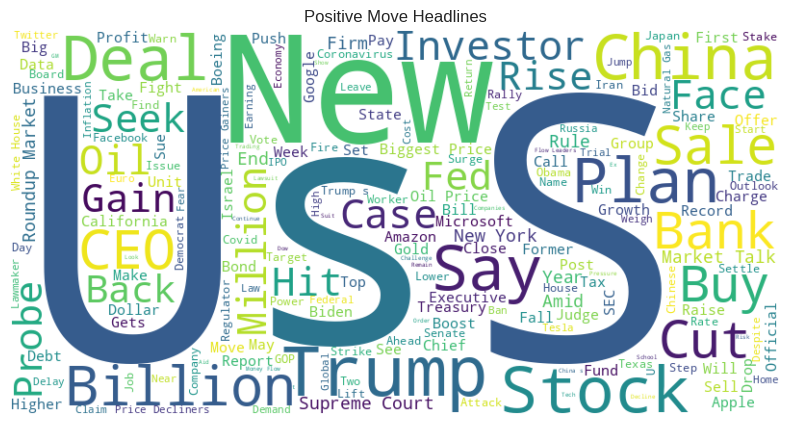

In [ ]:
# Positive Moves
pos_text = " ".join(positive_headlines)
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(pos_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Move Headlines')
plt.show()

In [ ]:
# For negative headlines
tfidf_sum_neg = X_neg.sum(axis=0)
tfidf_sum_neg = np.asarray(tfidf_sum_neg).flatten()
top_neg_indices = tfidf_sum_neg.argsort()[::-1][:10]
top_10_neg_words = words_neg[top_neg_indices]

print("\n🔻 Top 10 Negative Move Words 🔻")
for i, word in enumerate(top_10_neg_words, start=1):
    print(f"{i}. {word.capitalize()}")


🔻 Top 10 Negative Move Words 🔻
1. Trump
2. New
3. Oil
4. Stocks
5. Says
6. China
7. Dollar
8. Market
9. Deal
10. Court


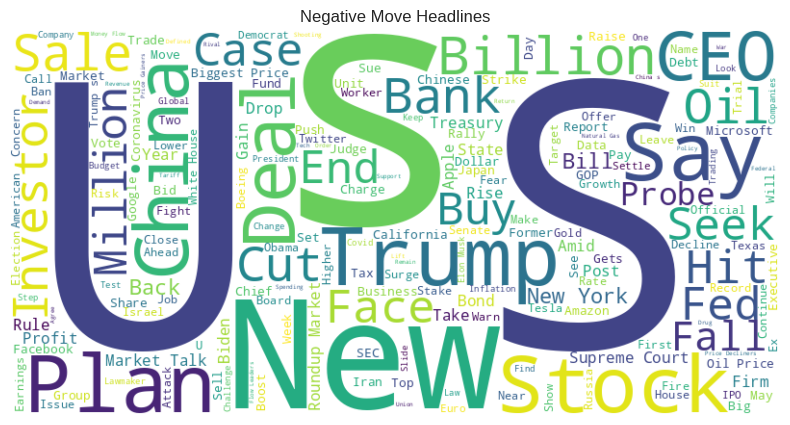

In [ ]:
# Negative Moves
neg_text = " ".join(negative_headlines)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(neg_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Move Headlines')
plt.show()

# Extras

"**If you have any suggestions or recommendations, feel free to comment below!**"